#### Transferências Contitucionais

##### O objetivo desse notebook é observar como está a distribuição das transferências para o estado do RJ, com um foco em Nova Iguaçu, comparando com outros municípios do estado, e descobrir quais trasnferências de Nova Iguaçu são mais altas ou mais baixas ao longo do tempo.

##### Transferências ICMS, FUNDEB, Ajuste FUNDEB e FPM são o foco das análises.

##### Importando Bibliotecas

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
#sns.set_style('dark')
#from scipy.stats import norm

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

##### Carregando Dados

In [2]:
data_path = "C:\\Users\\gabri\\Desktop\\Estágio\\Análise_Exploratória\\Dados\\"

In [3]:
file_list = os.listdir(data_path)
file_list_df = []

for file in range(0, len(file_list), 1):
    path = data_path+file_list[file]
    temp = pd.read_csv(path, sep=';', encoding='ANSI')
    file_list_df.append(temp)

In [4]:
Transferencias = pd.concat(file_list_df, ignore_index=True)

In [5]:
Transferencias.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1, inplace=True)

In [6]:
# Obtendo o total dos decêndios.
Transferencias['Total Decêndio'] = Transferencias['1º Decêndio'] + Transferencias['2º Decêndio'] + Transferencias['3º Decêndio']

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

##### Observando as Transferências e Itens de Transferências que temos

In [8]:
print("Temos *{}* Transferências nesse arquivo, e elas são:\n\n{}"\
      .format(Transferencias['Transferência'].value_counts().shape[0], \
              Transferencias['Transferência'].value_counts()))

Temos *12* Transferências nesse arquivo, e elas são:

FUNDEB                   3118706
Royalties                 512121
FPM                       317433
ITR                       297239
LC 87/96 (Lei Kandir)     289552
IOF-Ouro                  145659
CIDE-Combustíveis         111360
LC 173/2020 (PFEC)         44526
AFM/AFE                    38699
FEX                        30192
AJUSTE FUNDEB              24697
Cessão Onerosa              5569
Name: Transferência, dtype: int64


In [9]:
print("Temos *{}* Itens de Transferências nesse arquivo, e eles são:\n\n{}"\
      .format(Transferencias['Item transferência'].value_counts().shape[0], \
              Transferencias['Item transferência'].value_counts()))

Temos *26* Itens de Transferências nesse arquivo, e eles são:

FPM                             654645
ITR                             634444
IPVA                            331642
FPE                             331642
ITCMD                           330996
DEDU                            328248
IPI-EXP                         328225
ICMS                            328224
LC 87                           322978
FEP                             306240
ICMS/LC 87/96 - Lei Kandir      295121
COUN                            227041
IOF Ouro                        151228
CFM                             115396
CIDE/Combustível                111360
ANP                              50143
AUX                              38699
CFH                              30499
FEX                              30192
LC 173/2020 - PFEC INCISO II     22265
LC 173/2020 - PFEC INCISO I      22261
ITA                              18738
PBAM                              5569
ICME                              3418
I

In [10]:
print("Temos *{}* Itens de Transferências FUNDEB nesse arquivo, e eles são:\n\n{}"\
      .format(Transferencias[Transferencias['Transferência'] == 'FUNDEB']['Item transferência'].unique().shape[0], \
              Transferencias[Transferencias['Transferência'] == 'FUNDEB']['Item transferência'].value_counts()))

Temos *10* Itens de Transferências FUNDEB nesse arquivo, e eles são:

DEDU       322679
IPI-EXP    322656
ITR        322656
IPVA       322656
FPM        322656
FPE        322655
ICMS       322655
ITCMD      322010
LC 87      317409
COUN       220674
Name: Item transferência, dtype: int64


In [11]:
print("Temos *{}* Itens de Transferências FPM nesse arquivo, e ele é:\n\n{}"\
      .format(Transferencias[Transferencias['Transferência'] == 'FPM']['Item transferência'].unique().shape[0], \
              Transferencias[Transferencias['Transferência'] == 'FPM']['Item transferência'].value_counts()))

Temos *1* Itens de Transferências FPM nesse arquivo, e ele é:

FPM    317433
Name: Item transferência, dtype: int64


In [12]:
# Total de linhas e colunas do DataFrame.
print("Esse DataFrame tem um total de *{}* linhas e *{}* colunas."\
      .format(Transferencias.shape[0], Transferencias.shape[1]))

Esse DataFrame tem um total de *5023240* linhas e *10* colunas.


#### Analizando Transferências - Ano 2016-2020

##### Transferências Negativas: Vem de Ajuste FUNDEB, nos meses de Janeiro e Setembro de 2020, isso ocorreu em 10 estados do Brasil. 

In [13]:
Transferencias[Transferencias["Total Decêndio"] < 0]["Transferência"].value_counts()

AJUSTE FUNDEB    23064
Name: Transferência, dtype: int64

In [14]:
# Os Itens de transferência de Ajuste FUNDEB.
Transferencias[Transferencias["Total Decêndio"] < 0]["Item transferência"].value_counts()

FPE      3209
ICME     3209
FPM      3209
ITCMD    3208
IPVA     3208
IPIE     3203
ITR      3202
COUN      616
Name: Item transferência, dtype: int64

In [15]:
# Os estados em que essa Transferência ocoreu.
Transferencias[Transferencias["Total Decêndio"] < 0]["UF"].value_counts()

MG    5915
PR    5474
SP    4496
GO    1715
PE    1464
CE    1448
PA    1144
ES     546
AM     488
PI     374
Name: UF, dtype: int64

In [16]:
# Os meses de ocorrência.
Transferencias[Transferencias["Total Decêndio"] < 0]["Mês"].value_counts()

1    13626
9     9438
Name: Mês, dtype: int64

In [17]:
# O total de trasnferências negativas que ocorreram em 2020, e somente em 2020, pegando os dados 2016-2020 foi de 23064.
Transferencias[Transferencias["Total Decêndio"] < 0]["ANO"].value_counts()

2020    23064
Name: ANO, dtype: int64

In [18]:
# Esses valores negativos só ocorreram no 1º Decêndio.
Transferencias[Transferencias["1º Decêndio"] < 0]["Transferência"].value_counts()

AJUSTE FUNDEB    23064
Name: Transferência, dtype: int64

In [19]:
# Valores negativos do 1º Decêndio em ordem crescente.
Transferencias[Transferencias["1º Decêndio"] < 0]["1º Decêndio"].value_counts().sort_index(ascending=True)

-710,733.56     1
-356,017.23     1
-233,731.71     1
-219,783.54     1
-196,208.29     1
               ..
-0.05          34
-0.04          43
-0.03          38
-0.02          39
-0.01          36
Name: 1º Decêndio, Length: 15487, dtype: int64

In [20]:
# O menor valor Negativo foi no município de São Paulo no mês de Setembro.
Transferencias[Transferencias["1º Decêndio"] == -710733.56]

,Município,UF,ANO,Mês,1º Decêndio,2º Decêndio,3º Decêndio,Item transferência,Transferência,Total Decêndio
4855004,São Paulo,SP,2020,9,"-710,733.56",0.00,0.00,ICME,AJUSTE FUNDEB,"-710,733.56"


In [21]:
# Estatísticas:
Transferencias[Transferencias["1º Decêndio"] < 0]["Total Decêndio"].describe().sort_values(ascending=True)

min     -710,733.56
mean        -955.49
25%         -469.71
50%          -75.26
75%          -10.41
max           -0.01
std        6,959.16
count     23,064.00
Name: Total Decêndio, dtype: float64

In [22]:
Transferencias[Transferencias["1º Decêndio"] < 0].sort_values(by="Total Decêndio", ascending=True)

,Município,UF,ANO,Mês,1º Decêndio,2º Decêndio,3º Decêndio,Item transferência,Transferência,Total Decêndio
4855004,São Paulo,SP,2020,9,"-710,733.56",0.00,0.00,ICME,AJUSTE FUNDEB,"-710,733.56"
3971603,Manaus,AM,2020,1,"-356,017.23",0.00,0.00,ICME,AJUSTE FUNDEB,"-356,017.23"
3994667,Belo Horizonte,MG,2020,1,"-233,731.71",0.00,0.00,ICME,AJUSTE FUNDEB,"-233,731.71"
4774470,Goiânia,GO,2020,9,"-219,783.54",0.00,0.00,ICME,AJUSTE FUNDEB,"-219,783.54"
4814395,Curitiba,PR,2020,9,"-196,208.29",0.00,0.00,ICME,AJUSTE FUNDEB,"-196,208.29"
...,...,...,...,...,...,...,...,...,...,...
4854229,Santa Salete,SP,2020,9,-0.01,0.00,0.00,ITR,AJUSTE FUNDEB,-0.01
4846420,Guarani DOeste,SP,2020,9,-0.01,0.00,0.00,ITR,AJUSTE FUNDEB,-0.01
4854253,Santana da Ponte Pensa,SP,2020,9,-0.01,0.00,0.00,ITR,AJUSTE FUNDEB,-0.01
4842760,Balbinos,SP,2020,9,-0.01,0.00,0.00,ITR,AJUSTE FUNDEB,-0.01


#### Valores vazios em Transferência

In [23]:
# O mês de maio veio com os valores de Transferência vazios em 2018 em todos os estados do Brasil.
Transferencias[Transferencias["Transferência"].isna()].head()

,Município,UF,ANO,Mês,1º Decêndio,2º Decêndio,3º Decêndio,Item transferência,Transferência,Total Decêndio
2227077,Acrelândia,AC,2018,5,"445,563.88","54,609.29","176,120.62",FPM,NaN,"676,293.79"
2227078,Acrelândia,AC,2018,5,"1,549.48",173.42,0.00,ITR,NaN,"1,722.90"
2227079,Acrelândia,AC,2018,5,0.00,0.00,376.76,ICMS/LC 87/96 - Lei Kandir,NaN,376.76
2227080,Acrelândia,AC,2018,5,0.00,0.00,0.00,IOF Ouro,NaN,0.00
2227081,Acrelândia,AC,2018,5,"55,029.71","6,744.56","21,751.91",FPM,NaN,"83,526.18"


In [24]:
# Somente no mês de maio
Transferencias[Transferencias["Transferência"].isna()]["Mês"].value_counts()

5    87487
Name: Mês, dtype: int64

In [25]:
# Todos os estados.
Transferencias[Transferencias["Transferência"].isna()]["UF"].value_counts().shape[0]

27

#### Transferências e Itens de Transferência do RJ

In [26]:
print("Temos *{}* Transferências, e elas são:\n\n{}"\
      .format(Transferencias[Transferencias['UF'] == 'RJ']['Transferência'].unique().shape[0], \
              Transferencias[Transferencias['UF'] == 'RJ']['Transferência'].value_counts()))

print("\n\nTemos *{}* Itens de Transferências, e eles são:\n\n{}"\
      .format(Transferencias[Transferencias['UF'] == 'RJ']['Item transferência'].unique().shape[0], \
              Transferencias[Transferencias['UF'] == 'RJ']['Item transferência'].value_counts()))

Temos *12* Transferências, e elas são:

FUNDEB                   50968
Royalties                13966
FPM                       5244
ITR                       5025
LC 87/96 (Lei Kandir)     4784
IOF-Ouro                  2413
CIDE-Combustíveis         1840
LC 173/2020 (PFEC)         736
AFM/AFE                    631
FEX                        552
Cessão Onerosa              92
Name: Transferência, dtype: int64


Temos *23* Itens de Transferências, e eles são:

FPM                             10764
ITR                             10545
IPI-EXP                          5428
ICMS                             5428
ITCMD                            5428
DEDU                             5428
IPVA                             5428
FPE                              5428
LC 87                            5336
FEP                              5060
ICMS/LC 87/96 - Lei Kandir       4876
ANP                              4813
CFM                              3448
COUN                             3128
IO

#### Transferências e Itens de Transferência de Nova Iguaçu

In [27]:
print("Temos *{}* Transferências, e elas são:\n\n{}"\
      .format(Transferencias[Transferencias['Município'] == 'Nova Iguaçu']['Transferência'].unique().shape[0], \
              Transferencias[Transferencias['Município'] == 'Nova Iguaçu']['Transferência'].value_counts()))

print("\n\nTemos *{}* Itens de Transferências, e eles são:\n\n{}"\
      .format(Transferencias[Transferencias['Município'] == 'Nova Iguaçu']['Item transferência'].unique().shape[0], \
              Transferencias[Transferencias['Município'] == 'Nova Iguaçu']['Item transferência'].value_counts()))

Temos *12* Transferências, e elas são:

FUNDEB                   554
Royalties                163
FPM                       57
ITR                       57
LC 87/96 (Lei Kandir)     52
IOF-Ouro                  26
CIDE-Combustíveis         20
LC 173/2020 (PFEC)         8
AFM/AFE                    7
FEX                        6
Cessão Onerosa             1
Name: Transferência, dtype: int64


Temos *21* Itens de Transferências, e eles são:

FPM                             117
ITR                             117
DEDU                             59
ITCMD                            59
IPI-EXP                          59
FPE                              59
IPVA                             59
ICMS                             59
LC 87                            58
CFM                              56
FEP                              55
ANP                              55
ICMS/LC 87/96 - Lei Kandir       53
COUN                             34
IOF Ouro                         27
CIDE/Combustível

##### Transferências e Itens de Transferências não são iguais para todos os municípios.

In [28]:
print("Estado RJ:\nNº Transferência = ", \
      Transferencias[Transferencias['UF'] == 'RJ']['Transferência'].unique().shape[0])
print("Nº Item transferência = ", \
      Transferencias[Transferencias['UF'] == 'RJ']['Item transferência'].unique().shape[0])

print("\nRio de Janeiro:\nNº Transferência = ", \
      Transferencias[Transferencias['Município'] == 'Rio de Janeiro']['Transferência'].unique().shape[0])
print("Nº Item transferência = ", \
      Transferencias[Transferencias['Município'] == 'Rio de Janeiro']['Item transferência'].unique().shape[0])

print("\nNova Iguaçu:\nNº Transferência = ", \
      Transferencias[Transferencias['Município'] == 'Nova Iguaçu']['Transferência'].unique().shape[0])
print("Nº Item transferência = ", \
      Transferencias[Transferencias['Município'] == 'Nova Iguaçu']['Item transferência'].unique().shape[0])

print("\nDuque de Caxias:\nNº Transferência = ", \
      Transferencias[Transferencias['Município'] == 'Duque de Caxias']['Transferência'].unique().shape[0])
print("Nº Item transferência = ", \
      Transferencias[Transferencias['Município'] == 'Duque de Caxias']['Item transferência'].unique().shape[0])

Estado RJ:
Nº Transferência =  12
Nº Item transferência =  23

Rio de Janeiro:
Nº Transferência =  12
Nº Item transferência =  22

Nova Iguaçu:
Nº Transferência =  12
Nº Item transferência =  21

Duque de Caxias:
Nº Transferência =  12
Nº Item transferência =  21


In [29]:
# Municípios litorâneos:
print("\nParati:\nNº Transferência = ", \
      Transferencias[Transferencias['Município'] == 'Saquarema']['Transferência'].unique().shape[0])
print("Nº Item transferência = ", \
      Transferencias[Transferencias['Município'] == 'Saquarema']['Item transferência'].unique().shape[0])

print("\nParati:\nNº Transferência = ", \
      Transferencias[Transferencias['Município'] == 'Parati']['Transferência'].unique().shape[0])
print("Nº Item transferência = ", \
      Transferencias[Transferencias['Município'] == 'Parati']['Item transferência'].unique().shape[0])

print("\nParati:\nNº Transferência = ", \
      Transferencias[Transferencias['Município'] == 'Maricá']['Transferência'].unique().shape[0])
print("Nº Item transferência = ", \
      Transferencias[Transferencias['Município'] == 'Maricá']['Item transferência'].unique().shape[0])

# Aparentemente municípios litorâneos recebem mais itens de tranfefência.


Parati:
Nº Transferência =  12
Nº Item transferência =  22

Parati:
Nº Transferência =  12
Nº Item transferência =  22

Parati:
Nº Transferência =  12
Nº Item transferência =  22


##### Comparando nós vemos que esse item a mais é o Item de Transferência PEA. Isso se dá pela exploração de petróleo nessas regiôes, o que faz ter mais um Item de Transferência para esses municípios.

In [30]:
# Comparando Araruama e Nova Iguaçu.
print("Araruama:\n", Transferencias[Transferencias['Município'] == 'Araruama']['Item transferência'].unique(), "\n\n", \
      "Nova Iguaçu:\n", Transferencias[Transferencias['Município'] == 'Nova Iguaçu']['Item transferência'].unique())

Araruama:
 ['CIDE/Combustível' 'FPM' 'ITR' 'ICMS/LC 87/96 - Lei Kandir' 'IPI-EXP'
 'LC 87' 'IPVA' 'ITCMD' 'ICMS' 'DEDU' 'FPE' 'ANP' 'FEP' 'CFM' 'FEX' 'COUN'
 'IOF Ouro' 'PEA' 'PBAM' 'AUX' 'LC 173/2020 - PFEC INCISO I'
 'LC 173/2020 - PFEC INCISO II'] 

 Nova Iguaçu:
 ['CIDE/Combustível' 'FPM' 'ITR' 'ICMS/LC 87/96 - Lei Kandir' 'IPI-EXP'
 'LC 87' 'IPVA' 'ITCMD' 'ICMS' 'DEDU' 'FPE' 'ANP' 'FEP' 'CFM' 'FEX' 'COUN'
 'IOF Ouro' 'PBAM' 'AUX' 'LC 173/2020 - PFEC INCISO I'
 'LC 173/2020 - PFEC INCISO II']


#### Tratando Transferência vazia em Nova Iguaçu e Duque de Caxias

In [31]:
Query = Transferencias[(Transferencias["ANO"] == 2018) & \
                      (Transferencias["UF"] == "RJ") & \
                      (Transferencias["Município"] == "Nova Iguaçu")]

Query[Query["Transferência"].isna()]

,Município,UF,ANO,Mês,1º Decêndio,2º Decêndio,3º Decêndio,Item transferência,Transferência,Total Decêndio
2284055,Nova Iguaçu,RJ,2018,5,"2,995,809.85","367,172.97","1,184,171.09",FPM,NaN,"4,547,153.91"
2284056,Nova Iguaçu,RJ,2018,5,4.97,16.68,225.18,ITR,NaN,246.83
2284057,Nova Iguaçu,RJ,2018,5,0.00,0.00,"38,012.83",ICMS/LC 87/96 - Lei Kandir,NaN,"38,012.83"
2284058,Nova Iguaçu,RJ,2018,5,0.00,0.00,0.00,IOF Ouro,NaN,0.00
2284059,Nova Iguaçu,RJ,2018,5,"893,860.24","109,553.44","353,321.29",FPM,NaN,"1,356,734.97"
2284060,Nova Iguaçu,RJ,2018,5,"274,747.36","90,762.99","43,704.78",IPI-EXP,NaN,"409,215.13"
2284061,Nova Iguaçu,RJ,2018,5,0.00,0.00,0.00,COUN,NaN,0.00
2284062,Nova Iguaçu,RJ,2018,5,0.00,0.00,"46,991.56",LC 87,NaN,"46,991.56"
2284063,Nova Iguaçu,RJ,2018,5,302.05,203.83,60.87,ITR,NaN,566.75
2284064,Nova Iguaçu,RJ,2018,5,"348,779.91","179,913.72","297,069.67",IPVA,NaN,"825,763.30"


In [32]:
# Avaliando qual Transferência corresponde ao Item de Transfência x.
Query[Query["Item transferência"] == "CFM"]

,Município,UF,ANO,Mês,1º Decêndio,2º Decêndio,3º Decêndio,Item transferência,Transferência,Total Decêndio
1955072,Nova Iguaçu,RJ,2018,1,"5,988.77",0.00,0.00,CFM,Royalties,"5,988.77"
2037908,Nova Iguaçu,RJ,2018,2,0.00,"10,435.46",0.00,CFM,Royalties,"10,435.46"
2114738,Nova Iguaçu,RJ,2018,3,"42,008.41",0.00,0.00,CFM,Royalties,"42,008.41"
2197070,Nova Iguaçu,RJ,2018,4,"36,952.09",0.00,0.00,CFM,Royalties,"36,952.09"
2284071,Nova Iguaçu,RJ,2018,5,0.00,"41,143.11",0.00,CFM,NaN,"41,143.11"
2371460,Nova Iguaçu,RJ,2018,6,0.00,"58,685.29",0.00,CFM,Royalties,"58,685.29"
2462523,Nova Iguaçu,RJ,2018,7,0.00,"41,466.91",0.00,CFM,Royalties,"41,466.91"
2551559,Nova Iguaçu,RJ,2018,8,"24,719.09",0.00,0.00,CFM,Royalties,"24,719.09"
2638718,Nova Iguaçu,RJ,2018,9,0.00,"22,104.74",0.00,CFM,Royalties,"22,104.74"
2725025,Nova Iguaçu,RJ,2018,10,"42,136.88",0.00,0.00,CFM,Royalties,"42,136.88"


#### Corrigindo Valores Vazios Em Transferência

In [33]:
# Corrigindo para Nova Iguaçu.
Transferencias.loc[2284055, "Transferência"] = "FPM" # maior FPM
Transferencias.loc[2284056, "Transferência"] = "ITR" # menor ITR

Transferencias.loc[2284057, "Transferência"] = "LC 87/96 (Lei Kandir)" # único
Transferencias.loc[2284058, "Transferência"] = "IOF-Ouro" # único

Transferencias.loc[2284059:2284061, "Transferência"] = "FUNDEB" # único, index 2284059 menor FPM
Transferencias.loc[2284062, "Transferência"] = "LC 87" # único

Transferencias.loc[2284063:2284068, "Transferência"] = "FUNDEB" # único, index 284063 = maior ITR
Transferencias.loc[2284069:2284071, "Transferência"] = "Royalties" # único

# Corrigindo para Duque de Caxias.
Transferencias.loc[2283638, "Transferência"] = "FPM" # maior FPM
Transferencias.loc[2283639, "Transferência"] = "ITR" # menor ITR

Transferencias.loc[2283640, "Transferência"] = "LC 87/96 (Lei Kandir)" # único
Transferencias.loc[2283641, "Transferência"] = "IOF-Ouro" # único

Transferencias.loc[2283642:2283644, "Transferência"] = "FUNDEB" # único, index 2284059 menor FPM
Transferencias.loc[2283645, "Transferência"] = "LC 87" # único

Transferencias.loc[2283646:2283651, "Transferência"] = "FUNDEB" # único, index 284063 = maior ITR
Transferencias.loc[2283652:2283654, "Transferência"] = "Royalties" # único

In [34]:
# Os valores já foram atribuídos para Nova Iguaçu.
Transferencias.loc[2284055:2284071, "Transferência"]

2284055                      FPM
2284056                      ITR
2284057    LC 87/96 (Lei Kandir)
2284058                 IOF-Ouro
2284059                   FUNDEB
2284060                   FUNDEB
2284061                   FUNDEB
2284062                    LC 87
2284063                   FUNDEB
2284064                   FUNDEB
2284065                   FUNDEB
2284066                   FUNDEB
2284067                   FUNDEB
2284068                   FUNDEB
2284069                Royalties
2284070                Royalties
2284071                Royalties
Name: Transferência, dtype: object

In [35]:
# Os valores já foram atribuídos para Duque de Caxias.
Transferencias.loc[2283638:2283654, "Transferência"]

2283638                      FPM
2283639                      ITR
2283640    LC 87/96 (Lei Kandir)
2283641                 IOF-Ouro
2283642                   FUNDEB
2283643                   FUNDEB
2283644                   FUNDEB
2283645                    LC 87
2283646                   FUNDEB
2283647                   FUNDEB
2283648                   FUNDEB
2283649                   FUNDEB
2283650                   FUNDEB
2283651                   FUNDEB
2283652                Royalties
2283653                Royalties
2283654                Royalties
Name: Transferência, dtype: object

#### Análise Geral Brasil

##### Agrupando por Ano e Mês

In [36]:
# o mes 10 ta indo pro mes 1 tbm porue eu tinha passado pra str antes de passar pra data.

In [37]:
#Transferencias["Data"] = Transferencias["ANO"] + Transferencias["Mês"]/100

In [38]:
#Transferencias["Data"] = Transferencias["Data"].astype('datetime64')

In [39]:
Transferencias["Data"] = Transferencias["ANO"].astype("str") + "-" + (Transferencias["Mês"]).astype("str")

In [40]:
Transferencias["Data"] = pd.to_datetime(Transferencias["Data"])

In [41]:
type(Transferencias["Data"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [42]:
Transferencia_group_data = Transferencias.groupby("Data").sum() # soma dos decêndios 
Transferencia_group_data = Transferencia_group_data.reset_index() ## changing index

Transferencia_group_ano = Transferencias.groupby("ANO").sum() # soma dos decêndios 
Transferencia_group_ano = Transferencia_group_ano.reset_index() ## changing index

Transferencia_group_mes = Transferencias.groupby("Mês").sum() # soma dos decêndios 
Transferencia_group_mes = Transferencia_group_mes.reset_index() ## changing index

<Figure size 1080x432 with 0 Axes>

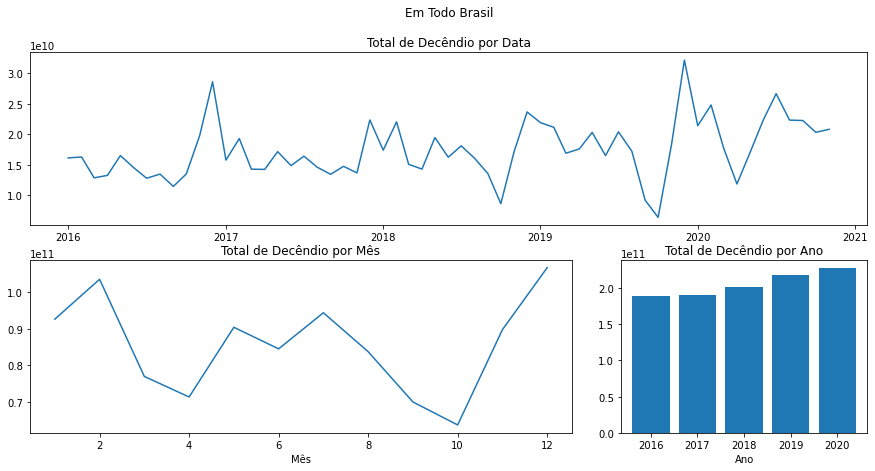

In [43]:
fig3 = plt.figure(constrained_layout=True)
fig3 = plt.figure(figsize=(15,7))

gs = fig3.add_gridspec(2, 3) ## number of charts
graph1 = fig3.add_subplot(gs[0, :]) ##chart 1
graph1.set_title("Em Todo Brasil\n\nTotal de Decêndio por Data")
graph1 = plt.plot(Transferencia_group_data["Data"], Transferencia_group_data["Total Decêndio"])


graph2 = fig3.add_subplot(gs[1, :-1])
graph2.set_title("Total de Decêndio por Mês")
graph2 = plt.plot(Transferencia_group_mes["Mês"], Transferencia_group_mes["Total Decêndio"])
graph2 = plt.xlabel("Mês")


graph3 = fig3.add_subplot(gs[1:, -1])
graph3.set_title("Total de Decêndio por Ano")
graph3 = plt.bar(Transferencia_group_ano["ANO"], Transferencia_group_ano["Total Decêndio"])
graph3 = plt.xlabel("Ano")

fig3 = fig3

In [44]:
Transferencia_group_data[["Data", "Total Decêndio"]]

,Data,Total Decêndio
0,2016-01-01,"16,135,402,874.49"
1,2016-02-01,"16,286,539,795.25"
2,2016-03-01,"12,872,678,962.13"
3,2016-04-01,"13,278,269,155.39"
4,2016-05-01,"16,518,758,356.19"
5,2016-06-01,"14,533,220,885.93"
6,2016-07-01,"12,804,683,895.94"
7,2016-08-01,"13,485,423,175.57"
8,2016-09-01,"11,471,702,956.16"
9,2016-10-01,"13,508,685,466.89"


In [45]:
Transferencia_group_mes[["Mês", "Total Decêndio"]]

,Mês,Total Decêndio
0,1,"92,633,155,008.17"
1,2,"103,559,857,265.72"
2,3,"76,935,917,462.13"
3,4,"71,304,250,841.96"
4,5,"90,403,509,483.88"
5,6,"84,499,528,142.55"
6,7,"94,385,237,443.33"
7,8,"83,732,624,343.33"
8,9,"69,950,440,797.03"
9,10,"63,646,375,876.39"


In [46]:
Transferencia_group_ano[["ANO", "Total Decêndio"]]

,ANO,Total Decêndio
0,2016,"189,269,596,503.40"
1,2017,"190,923,333,680.65"
2,2018,"201,839,962,525.33"
3,2019,"218,024,121,846.24"
4,2020,"227,483,563,605.06"


##### Análise Geral RJ

In [47]:
# Quais municípios do RJ receberam maior transferência nos últimos 5 anos.
Transferencias[Transferencias["UF"] == "RJ"].sort_values(by="Total Decêndio", ascending=False).head()

,Município,UF,ANO,Mês,1º Decêndio,2º Decêndio,3º Decêndio,Item transferência,Transferência,Total Decêndio,Data
4133255,Maricá,RJ,2020,2,0.00,"294,862,816.64",0.00,PEA,Royalties,"294,862,816.64",2020-02-01
2811383,Maricá,RJ,2018,11,0.00,"190,100,789.80","90,509,933.78",PEA,Royalties,"280,610,723.58",2018-11-01
3078769,Maricá,RJ,2019,2,0.00,"262,424,661.78",0.00,PEA,Royalties,"262,424,661.78",2019-02-01
4133370,Niterói,RJ,2020,2,0.00,"259,011,347.59",0.00,PEA,Royalties,"259,011,347.59",2020-02-01
2551409,Maricá,RJ,2018,8,0.00,"257,018,268.86",0.00,PEA,Royalties,"257,018,268.86",2018-08-01


In [48]:
# Quais municípios do RJ receberam maior transferência no ano de 2020.
Transferencias[(Transferencias["UF"] == "RJ") & \
               (Transferencias["ANO"] == 2020)].sort_values(by="Total Decêndio", ascending=False).head()

,Município,UF,ANO,Mês,1º Decêndio,2º Decêndio,3º Decêndio,Item transferência,Transferência,Total Decêndio,Data
4133255,Maricá,RJ,2020,2,0.00,"294,862,816.64",0.00,PEA,Royalties,"294,862,816.64",2020-02-01
4133370,Niterói,RJ,2020,2,0.00,"259,011,347.59",0.00,PEA,Royalties,"259,011,347.59",2020-02-01
4997147,Rio de Janeiro,RJ,2020,11,"90,707,904.02","129,748,045.97","17,088,338.88",ICMS,FUNDEB,"237,544,288.87",2020-11-01
4996753,Maricá,RJ,2020,11,0.00,"218,443,981.85",0.00,PEA,Royalties,"218,443,981.85",2020-11-01
4410599,Maricá,RJ,2020,5,0.00,"209,948,562.43",0.00,PEA,Royalties,"209,948,562.43",2020-05-01


In [49]:
# Quantidade de municípios do estado do RJ.
print("O Estado do RJ tem *{}* municípios e eles são:\n\n{} ".format(
    len(Transferencias[Transferencias['UF'] == "RJ"]["Município"].unique()), 
    Transferencias[Transferencias['UF'] == "RJ"]["Município"].unique()))

O Estado do RJ tem *92* municípios e eles são:

['Angra dos Reis' 'Aperibé' 'Araruama' 'Areal' 'Armação de Búzios'
 'Arraial do Cabo' 'Barra do Piraí' 'Barra Mansa' 'Belford Roxo'
 'Bom Jardim' 'Bom Jesus do Itabapoana' 'Cabo Frio' 'Cachoeiras de Macacu'
 'Cambuci' 'Campos dos Goytacazes' 'Cantagalo' 'Carapebus'
 'Cardoso Moreira' 'Carmo' 'Casimiro de Abreu' 'Comendador Levy Gasparian'
 'Conceição de Macabu' 'Cordeiro' 'Duas Barras' 'Duque de Caxias'
 'Engenheiro Paulo de Frontin' 'Guapimirim' 'Iguaba Grande' 'Itaboraí'
 'Itaguaí' 'Italva' 'Itaocara' 'Itaperuna' 'Itatiaia' 'Japeri'
 'Laje do Muriaé' 'Macaé' 'Macuco' 'Magé' 'Mangaratiba' 'Maricá' 'Mendes'
 'Mesquita' 'Miguel Pereira' 'Miracema' 'Natividade' 'Nilópolis' 'Niterói'
 'Nova Friburgo' 'Nova Iguaçu' 'Paracambi' 'Paraíba do Sul' 'Parati'
 'Paty do Alferes' 'Petrópolis' 'Pinheiral' 'Piraí' 'Porciúncula'
 'Porto Real' 'Quatis' 'Queimados' 'Quissamã' 'Resende' 'Rio Bonito'
 'Rio Claro' 'Rio das Flores' 'Rio das Ostras' 'Rio de Jan

#### Análise Em Municípios

##### O Item de Transferência FPM vem da Transferência FPM e também da Transferência FUNDEB, onde o recebido pela FUNDEB é  menor que o recebido direto pela Transferência FPM.

In [50]:
NI = Transferencias[(Transferencias["UF"] == "RJ") & \
                    (Transferencias["Município"] == "Nova Iguaçu")]

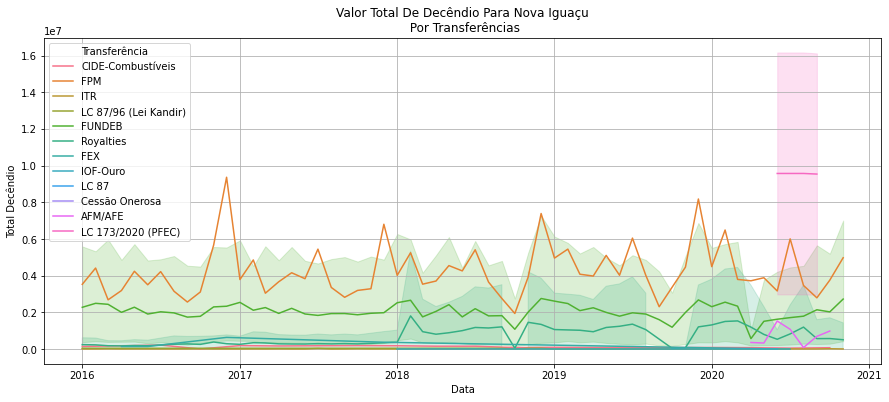

In [51]:
# Mesmo pegando todos os Itens de Transferência FUNDEB ainda assim a Transferência de FPM é maior.
plt.title("Valor Total De Decêndio Para Nova Iguaçu\n Por Transferências")
plt.grid(True)
plt.xlabel("Tempo")

sns.lineplot(x="Data", y="Total Decêndio", hue="Transferência", data=NI)

##### Observamos também que a transferência Royalties teve um crescimento significativo de 2017 a 2018, e se manteve mais alto até cair bastante no final de 2019 ficando mais baixo do que estava no final de 2017.

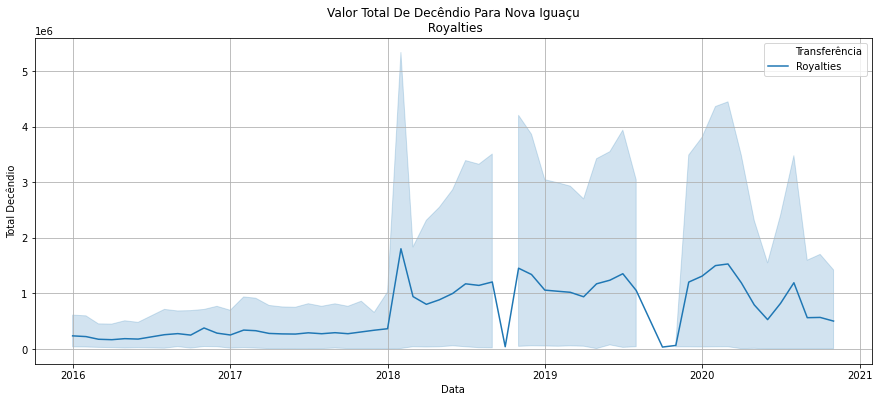

In [52]:
# Royalties.
plt.title("Valor Total De Decêndio Para Nova Iguaçu\n Royalties")
plt.grid(True)
plt.xlabel("Tempo")

sns.lineplot(x="Data", y="Total Decêndio", hue="Transferência", data=NI[NI["Transferência"] == "Royalties"])

In [53]:
# Grande queda em 2018.
agosto2018 = NI[(NI["ANO"] == 2020)&(NI["Mês"] == 8)&(NI["Transferência"] == "Royalties")]["Total Decêndio"]
setembro2018 = NI[(NI["ANO"] == 2020)&(NI["Mês"] == 9)&(NI["Transferência"] == "Royalties")]["Total Decêndio"]

In [54]:
# A diferença foi de:
agosto2018.values[0] - setembro2018.values[0]

1878717.42

##### Itens de Transferência FUNDEB

In [55]:
# Tipos de Transferência FUNDEB
NI_FUNDEB = Transferencias[(Transferencias["UF"] == "RJ") & \
            (Transferencias["Município"] == "Nova Iguaçu")& \
            (Transferencias["Transferência"] == "FUNDEB")]

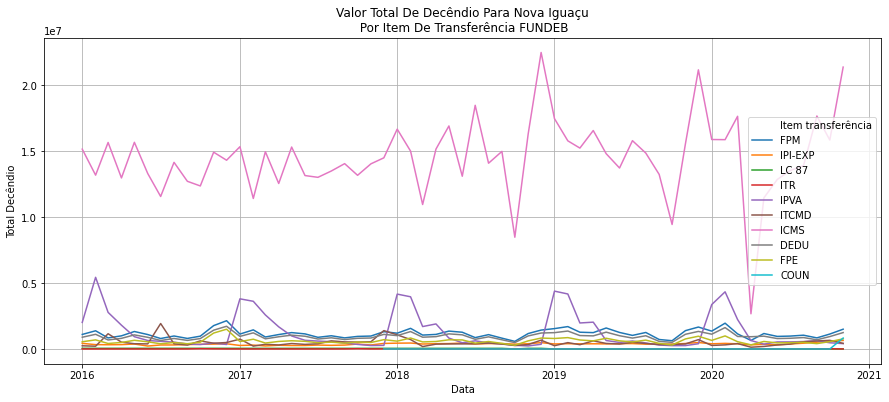

In [56]:
# ICMS é a maior Transferência de FUNDEB.
plt.title("Valor Total De Decêndio Para Nova Iguaçu\n Por Item De Transferência FUNDEB")
plt.grid(True)
plt.xlabel("Tempo")

sns.lineplot(x="Data", y="Total Decêndio", hue="Item transferência", data=NI_FUNDEB)

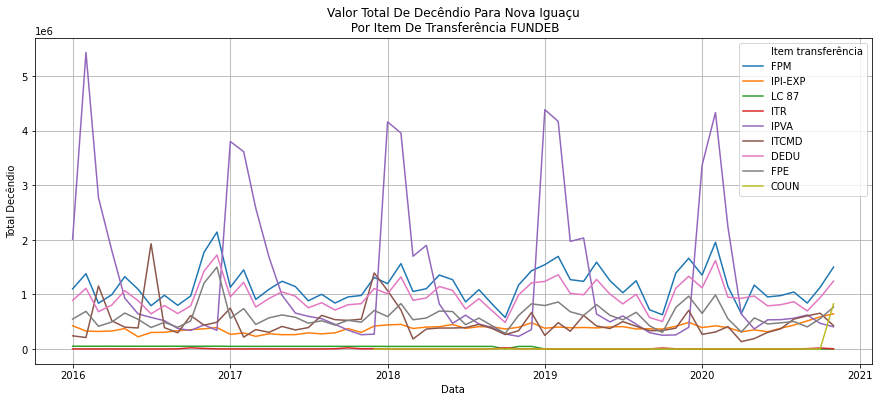

In [57]:
# Transferência FUNDEB sem o Item ICMS.
plt.title("Valor Total De Decêndio Para Nova Iguaçu\n Por Item De Transferência FUNDEB")
plt.grid(True)
plt.xlabel("Tempo")

sns.lineplot(x="Data", y="Total Decêndio", hue="Item transferência", \
             data=NI_FUNDEB[NI_FUNDEB["Item transferência"] != "ICMS"])

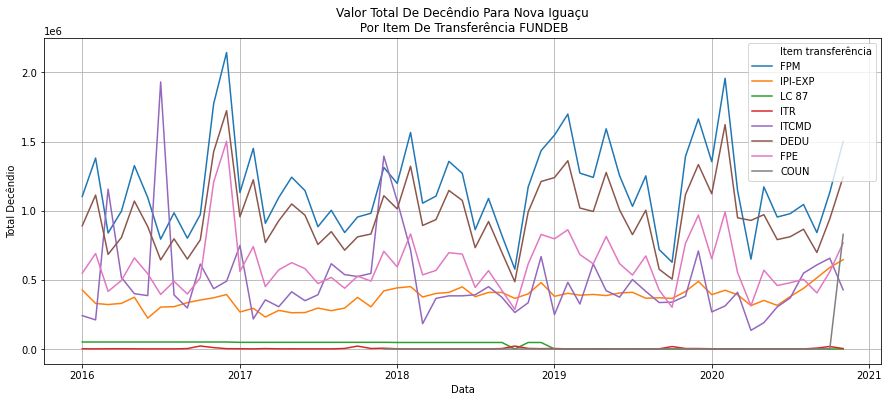

In [58]:
# Transferência FUNDEB sem o Item ICMS e sem IPVA.
plt.title("Valor Total De Decêndio Para Nova Iguaçu\n Por Item De Transferência FUNDEB")
plt.grid(True)
plt.xlabel("Tempo")

sns.lineplot(x="Data", y="Total Decêndio", hue="Item transferência", \
             data=NI_FUNDEB[(NI_FUNDEB["Item transferência"] != "ICMS") & (NI_FUNDEB["Item transferência"] != "IPVA")])

##### ICMS

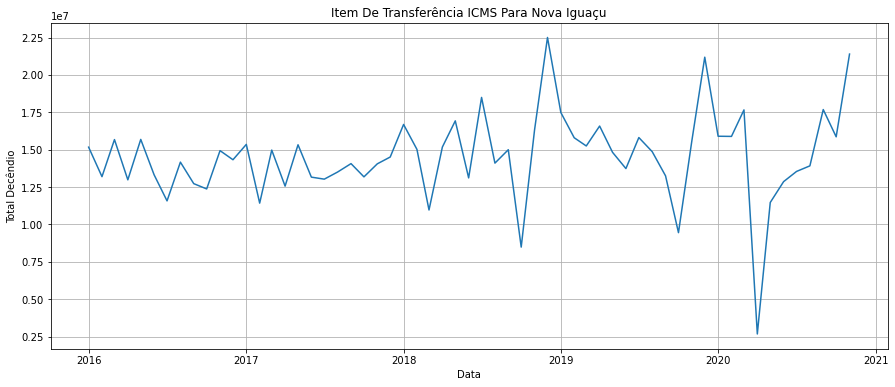

In [59]:
plt.title("Item De Transferência ICMS Para Nova Iguaçu")
plt.grid(True)
plt.xlabel("Tempo")

sns.lineplot(x="Data", y="Total Decêndio", data=NI_FUNDEB[NI_FUNDEB["Item transferência"] == "ICMS"])

In [60]:
# Grande queda em 2020.
marco2020 = NI[(NI["ANO"] == 2020)&(NI["Mês"] == 3)&(NI["Item transferência"] == "ICMS")]["Total Decêndio"]
abriu2020 = NI[(NI["ANO"] == 2020)&(NI["Mês"] == 4)&(NI["Item transferência"] == "ICMS")]["Total Decêndio"]

In [61]:
# A diferença foi de:
marco2020.values[0] - abriu2020.values[0]

14988883.87

In [62]:
# Grande alta em 2018.
outubro2018 = NI[(NI["ANO"] == 2018)&(NI["Mês"] == 10)&(NI["Item transferência"] == "ICMS")]["Total Decêndio"]
novembro2018 = NI[(NI["ANO"] == 2018)&(NI["Mês"] == 11)&(NI["Item transferência"] == "ICMS")]["Total Decêndio"]

In [64]:
# A diferença foi de:
novembro2018.values[0] - outubro2018.values[0]

7845398.119999999

##### FPM

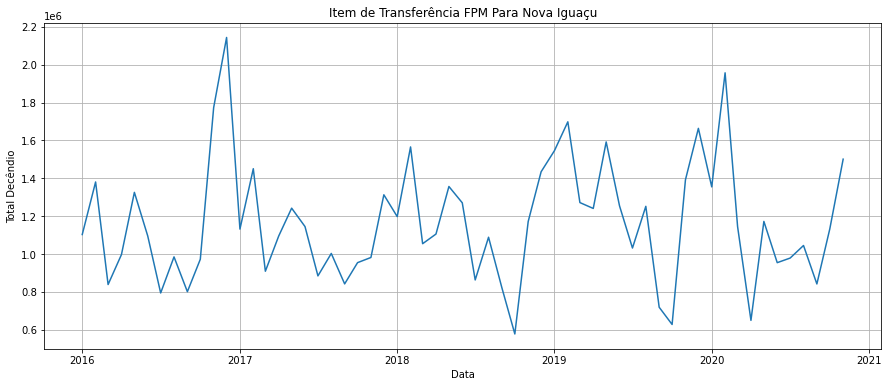

In [65]:
plt.title("Item de Transferência FPM Para Nova Iguaçu")
plt.grid(True)
plt.xlabel("Tempo")

sns.lineplot(x="Data", y="Total Decêndio", data=NI_FUNDEB[NI_FUNDEB["Item transferência"] == "FPM"])

#### Analisando - PFEC INCISO I (PFEC), LC 173/2020 - PFEC INCISO I e LC 173/2020 - PFEC INCISO II

##### Essas são as Transferências do Auxílio Emergencial devido a Covid 19

In [66]:
# Transferência que começou a ser paga no mês 06/2020.
LC_PFEC  = Transferencias[Transferencias["Transferência"] == "LC 173/2020 (PFEC)"].sort_values(by="Total Decêndio", \
                                                                                                 ascending=False)
LC_PFEC .head(12)
# É possível notar que no mês 9 ela tem uma queda e perde sua constancia no valor total de pagamentos por mês.

,Município,UF,ANO,Mês,1º Decêndio,2º Decêndio,3º Decêndio,Item transferência,Transferência,Total Decêndio,Data
4753138,São Paulo,SP,2020,8,0.00,"298,873,664.49",0.00,LC 173/2020 - PFEC INCISO II,LC 173/2020 (PFEC),"298,873,664.49",2020-08-01
4549210,São Paulo,SP,2020,6,"298,873,664.49",0.00,0.00,LC 173/2020 - PFEC INCISO II,LC 173/2020 (PFEC),"298,873,664.49",2020-06-01
4659492,São Paulo,SP,2020,7,0.00,"298,873,664.49",0.00,LC 173/2020 - PFEC INCISO II,LC 173/2020 (PFEC),"298,873,664.49",2020-07-01
4855007,São Paulo,SP,2020,9,0.00,"298,254,434.86",0.00,LC 173/2020 - PFEC INCISO II,LC 173/2020 (PFEC),"298,254,434.86",2020-09-01
4724746,Rio de Janeiro,RJ,2020,8,0.00,"132,312,883.33",0.00,LC 173/2020 - PFEC INCISO II,LC 173/2020 (PFEC),"132,312,883.33",2020-08-01
4625854,Rio de Janeiro,RJ,2020,7,0.00,"132,312,883.33",0.00,LC 173/2020 - PFEC INCISO II,LC 173/2020 (PFEC),"132,312,883.33",2020-07-01
4515609,Rio de Janeiro,RJ,2020,6,"132,312,883.33",0.00,0.00,LC 173/2020 - PFEC INCISO II,LC 173/2020 (PFEC),"132,312,883.33",2020-06-01
4822794,Rio de Janeiro,RJ,2020,9,0.00,"132,107,524.70",0.00,LC 173/2020 - PFEC INCISO II,LC 173/2020 (PFEC),"132,107,524.70",2020-09-01
4471301,Belo Horizonte,MG,2020,6,"60,159,078.14",0.00,0.00,LC 173/2020 - PFEC INCISO II,LC 173/2020 (PFEC),"60,159,078.14",2020-06-01
4581550,Belo Horizonte,MG,2020,7,0.00,"60,159,078.14",0.00,LC 173/2020 - PFEC INCISO II,LC 173/2020 (PFEC),"60,159,078.14",2020-07-01


In [67]:
# Queda no Tipo de Transferência.

LC_INCISO_I = NI[NI["Item transferência"] == "LC 173/2020 - PFEC INCISO I"]
LC_INCISO_II = NI[NI["Item transferência"] == "LC 173/2020 - PFEC INCISO II"]

Queda_LC_INCISO_I = LC_INCISO_I["Total Decêndio"].max() - \
                    LC_INCISO_I["Total Decêndio"].min()

Queda_LC_INCISO_II = LC_INCISO_II["Total Decêndio"].max() - \
                     LC_INCISO_II["Total Decêndio"].min()

print("No mês de Setembro em relação aos outros meses do ano, em Nova Iguaçu:\n\nO Item de Transferência LC 173/2020 - PFEC INCISO I teve uma queda na Transferência de R${} reais."\
      .format(Queda_LC_INCISO_I))

print("\nJá o Item de Transferência LC 173/2020 - PFEC INCISO II a queda na Transferência doi de R${} reais."\
      .format(Queda_LC_INCISO_II))

No mês de Setembro em relação aos outros meses do ano, em Nova Iguaçu:

O Item de Transferência LC 173/2020 - PFEC INCISO I teve uma queda na Transferência de R$14535.310000000056 reais.

Já o Item de Transferência LC 173/2020 - PFEC INCISO II a queda na Transferência doi de R$51710.949999999255 reais.


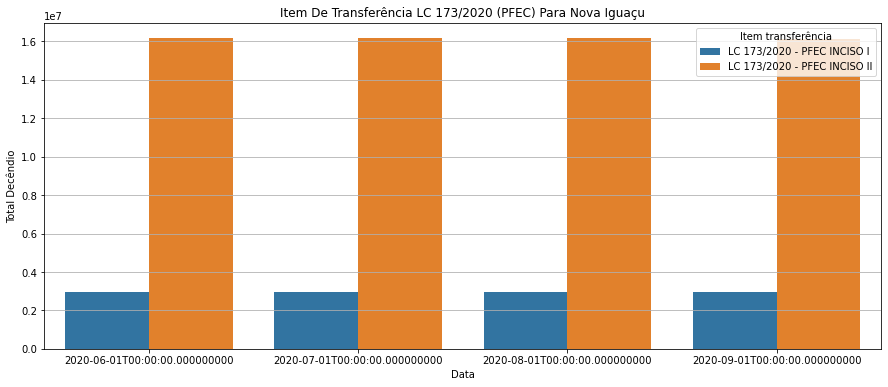

In [68]:
plt.title("Item De Transferência LC 173/2020 (PFEC) Para Nova Iguaçu")
plt.grid(True)
plt.xlabel("Tempo")

sns.barplot(data= NI[NI["Transferência"] == "LC 173/2020 (PFEC)"], \
            x="Data", y="Total Decêndio", hue="Item transferência")

# LC 173/2020 - PFEC INCISO II é sempre maior que a LC 173/2020 - PFEC INCISO I.

#### Total Decêndio Nova Iguaçu 

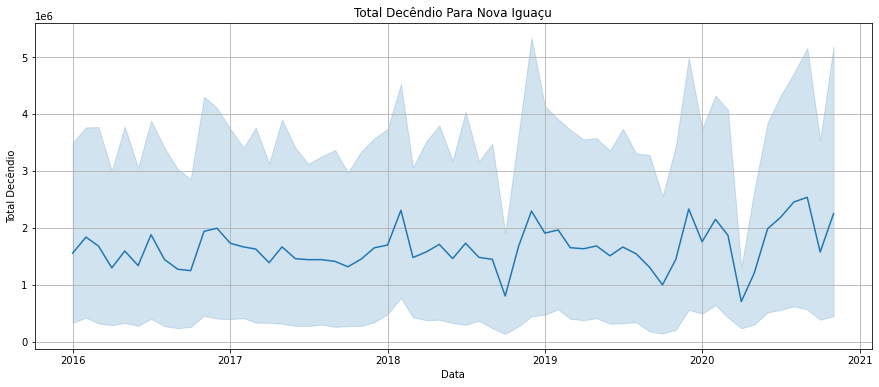

In [69]:
plt.title("Total Decêndio Para Nova Iguaçu")
plt.grid(True)
plt.xlabel("Tempo")

sns.lineplot(x="Data", y="Total Decêndio", data=NI)

#### Séries temporais

In [70]:
NI.set_index("Data", inplace=True)
NI_FUNDEB.set_index("Data", inplace=True)

In [71]:
ts = NI_FUNDEB[NI_FUNDEB["Item transferência"] == "ICMS"]
ts.head()

,Município,UF,ANO,Mês,1º Decêndio,2º Decêndio,3º Decêndio,Item transferência,Transferência,Total Decêndio
Data,,,,,,,,,,
2016-01-01,Nova Iguaçu,RJ,2016,1,0.00,"10,975,823.72","4,192,339.02",ICMS,FUNDEB,"15,168,162.74"
2016-02-01,Nova Iguaçu,RJ,2016,2,"1,499,518.13","10,593,842.28","1,101,333.40",ICMS,FUNDEB,"13,194,693.81"
2016-03-01,Nova Iguaçu,RJ,2016,3,"4,396,434.02","8,809,014.77","2,469,140.84",ICMS,FUNDEB,"15,674,589.63"
2016-04-01,Nova Iguaçu,RJ,2016,4,"977,840.36","11,240,576.61","764,289.77",ICMS,FUNDEB,"12,982,706.74"
2016-05-01,Nova Iguaçu,RJ,2016,5,"3,993,487.51","8,838,127.85","2,854,858.19",ICMS,FUNDEB,"15,686,473.55"


In [72]:
ts = ts["Total Decêndio"]

O teste ADF pertence a uma categoria de testes chamada "Teste de raiz unitária", que é o método adequado para testar a estacionariedade de uma série temporal.

A raiz unitária é uma característica de uma série temporal que a torna não estacionária.

A hipótese nula do teste é a presença de raiz unitária, ou seja, a série é não estacionária.

Um ponto-chave a lembrar aqui é: Como a hipótese nula assume a presença de raiz unitária, ou seja, α = 1, o valor de p obtido deve ser menor do que o nível de significância (digamos 0,05) para rejeitar a hipótese nula. Desse modo, inferindo que a série é estacionária.

Quando a estatística de teste é inferior ao valor crítico mostrado, rejeitamos a hipótese nula e infere que a série temporal é estacionária.

In [73]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determinando estatísticas móveis.
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plotando estatísticas móveis:
    original = plt.plot(timeseries, color='steelblue', label='Original', marker='.')
    mean = plt.plot(rolmean, color='lightcoral', label="Média Móvel", marker='.')
    std = plt.plot(rolstd, color='dimgrey', label = "Desvio Padrão", marker='.')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Média Móvel & Desvio Padrão')
    plt.xlabel("Tempo")
    plt.ylabel("Total Decêndio")
    plt.show(block=False)
    
    #Realizando o teste de Dickey-Fuller:
    print('Resultado do teste de Dickey-Fuller:\n')
    dftest = adfuller(timeseries, autolag='AIC')
    
    print(f'Test Statistic: {dftest[0]}')
    print(f'n_lags: {dftest[1]}')
    print(f'p-value: {dftest[2]}')
    print(f'Número de observações usadas: {dftest[3]}')
    
    print('Valores Criticos:')
    for key, value in dftest[4].items():
        print(f'   {key} {value}')  

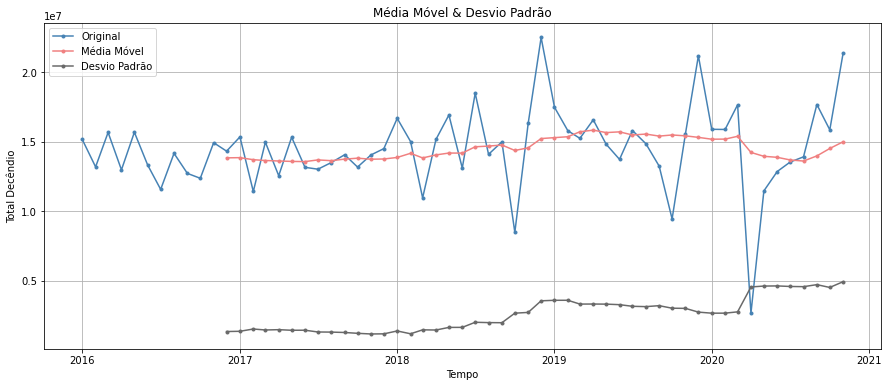

Resultado do teste de Dickey-Fuller:

Test Statistic: -6.289063499135671
n_lags: 3.636950423259436e-08
p-value: 0
Número de observações usadas: 58
Valores Criticos:
   1% -3.548493559596539
   5% -2.912836594776334
   10% -2.594129155766944


In [74]:
test_stationarity(ts)

##### Usando A função logarítmica

In [75]:
ts_log = np.log(ts)
moving_avg = ts_log.rolling(12).mean()

Text(0, 0.5, 'Total Decêndio')

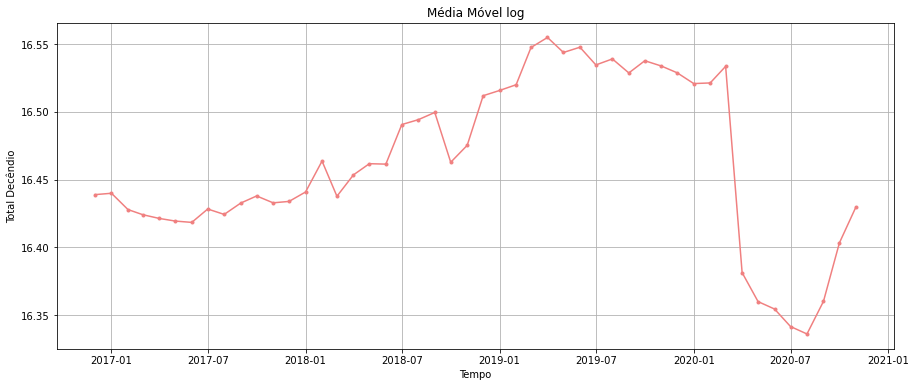

In [76]:
graph_log_mean = plt.plot(moving_avg, color='lightcoral', marker='.')

plt.grid(True)
plt.title("Média Móvel log")
plt.xlabel("Tempo")
plt.ylabel("Total Decêndio")

In [77]:
# Observe os primeiro 11 como sendo NaN. Vamos usar esses valores NaN para testar a estacionaridade.
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Data
2016-01-01    nan
2016-02-01    nan
2016-03-01    nan
2016-04-01    nan
2016-05-01    nan
2016-06-01    nan
2016-07-01    nan
2016-08-01    nan
2016-09-01    nan
2016-10-01    nan
2016-11-01    nan
2016-12-01   0.04
Name: Total Decêndio, dtype: float64

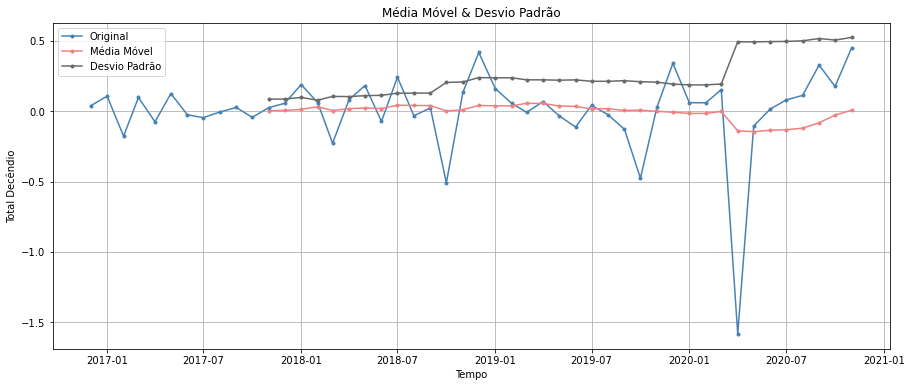

Resultado do teste de Dickey-Fuller:

Test Statistic: -6.271514277903399
n_lags: 3.99367357618628e-08
p-value: 0
Número de observações usadas: 47
Valores Criticos:
   1% -3.5778480370438146
   5% -2.925338105429433
   10% -2.6007735310095064


In [78]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

##### Eliminando Tendência e Sazonalidade
As técnicas simples de redução de tendência não funcionam em todos os casos, particularmente naqueles com alta sazonalidade. Abaixo veremos outra maneira de remoção de tendência e de sazonalidade:

1- Decomposição – modelando tanto a tendência quanto a sazonalidade e removendo-as a partir do modelo.

##### Decomposição
Nesta abordagem, tanto tendência quanto sazonalidade são modeladas separadamente e a parte restante da série é devolvida.

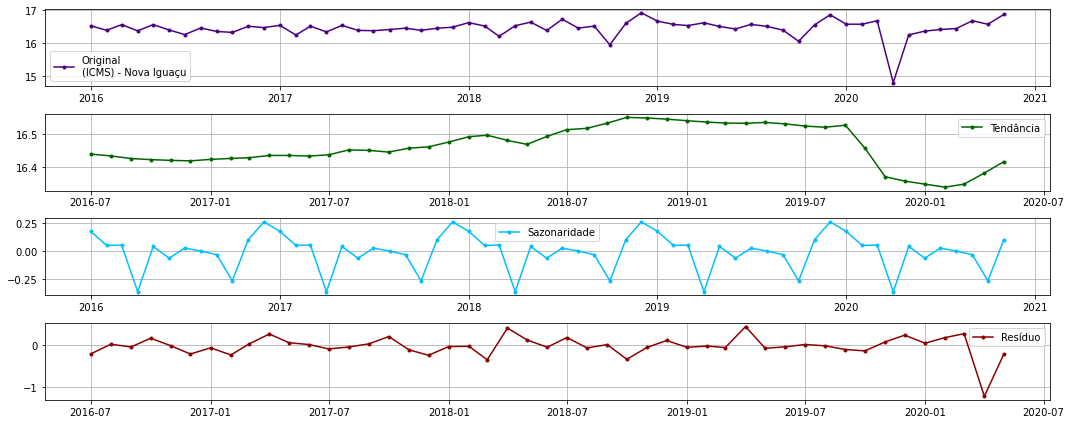

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log) 
tendencia = decomposition.trend 
sazonaridade = decomposition.seasonal 
residuo = decomposition.resid 


plt.subplot(411) 
plt.plot(ts_log, label='Original\n(ICMS) - Nova Iguaçu', color="indigo", marker='.')
plt.legend(loc='best') 
plt.grid(True)

plt.subplot(412) 
plt.plot(tendencia, label='Tendância', color="darkgreen", marker='.') 
plt.legend(loc='best')
plt.grid(True)

plt.subplot(413) 
plt.plot(sazonaridade,label='Sazonaridade', color="deepskyblue", marker='.') 
plt.legend(loc='best')
plt.grid(True)

plt.subplot(414) 
plt.plot(residuo, label='Resíduo', color="darkred", marker='.')
plt.grid(True)

plt.legend(loc='best') 
plt.tight_layout()

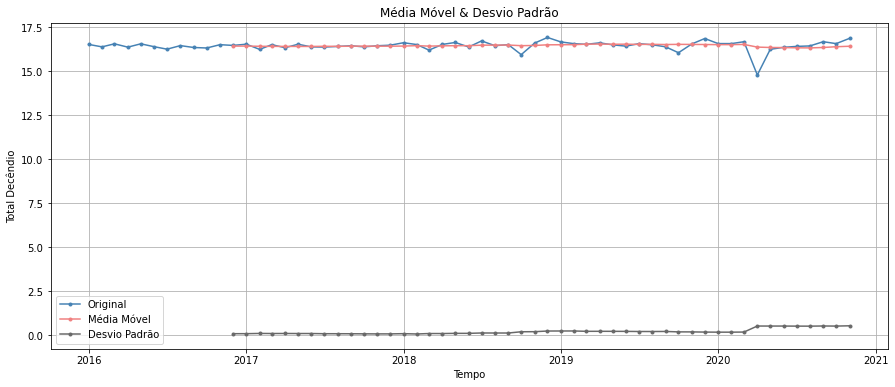

Resultado do teste de Dickey-Fuller:

Test Statistic: -7.013256313997354
n_lags: 6.835122920643433e-10
p-value: 0
Número de observações usadas: 58
Valores Criticos:
   1% -3.548493559596539
   5% -2.912836594776334
   10% -2.594129155766944


In [82]:
ts_log_decompose = ts_log
ts_log_decompose.dropna(inplace=True) 
test_stationarity(ts_log_decompose)

A estatística do teste Dickey-Fuller é significativamente menor do que o valor crítico de 1%. Portanto, essa TS é muito próxima a estacionária.

O valor p é inferior ao nível de significância de 0,05 e, portanto, podemos rejeitar a hipótese nula e dizer que a série é estacionária.

Text(0, 0.5, 'Total Decêndio')

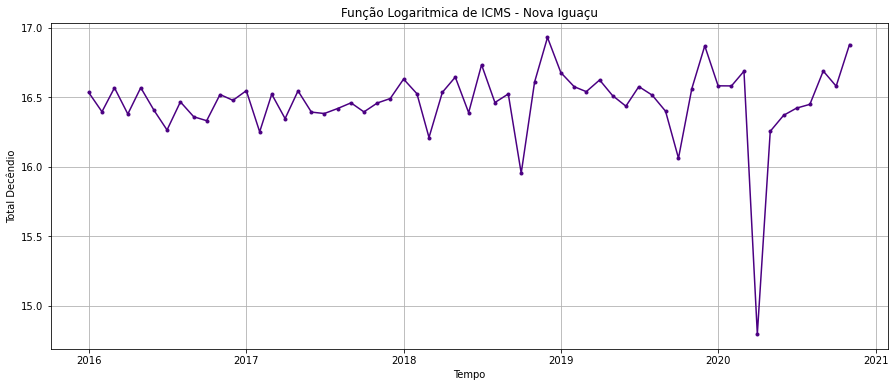

In [84]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log, color="indigo", marker='.')
plt.grid(True)
plt.title('Função Logaritmica de ICMS - Nova Iguaçu')
plt.xlabel("Tempo")
plt.ylabel("Total Decêndio")

Fonte dos dados: https://dados.gov.br/

##### Gabrielle Araújo.